In [47]:
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets
import classical_part, utilities, entangled_circuit
import random
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of classical_part failed: Traceback (most recent call last):
  File "C:\Users\haime\AppData\Roaming\Python\Python38\site-packages\IPython\extensions\autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\haime\AppData\Roaming\Python\Python38\site-packages\IPython\extensions\autoreload.py", line 455, in superreload
    module = reload(module)
  File "c:\Users\haime\AppData\Local\Programs\Python\Python38\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "c:\Users\haime\OneDrive\Documents\GitHub\GeneticCircuit\codes\classical_part.py", line 147, in <module>
    def load_mnist_fashion(n_train: int, n_val: int, n_test: int, quanv: types.FunctionType = quantum_model, is_take_xq = False):
Nam

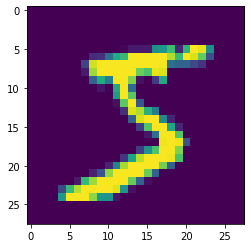

In [41]:
plt.imshow(x_train[0])

In [52]:
import qiskit, numpy as np, entangled_circuit
import importlib
importlib.reload(entangled_circuit)

<module 'entangled_circuit' from 'c:\\Users\\haime\\OneDrive\\Documents\\GitHub\\GeneticCircuit\\codes\\entangled_circuit.py'>

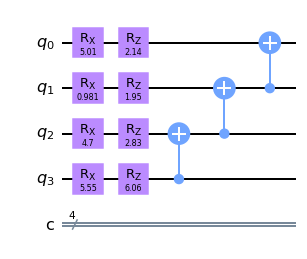

In [33]:
n = 4
qc = qiskit.QuantumCircuit(n, n)
thetas = np.random.uniform(low=0, high=2*np.pi, size=(3*n - 1,))
qc = entangled_circuit.xz_layer(qc, thetas[:2*n])
qc = entangled_circuit.entangled_cnot_layer(qc)
qc.draw('mpl')

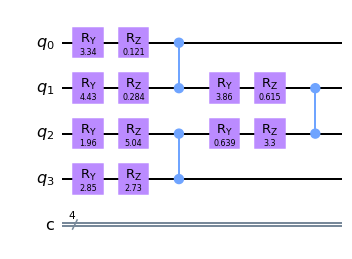

In [60]:
n = 4
qc = qiskit.QuantumCircuit(n, n)
qc = entangled_circuit.quanvolutional12(qc)
qc.draw('mpl')

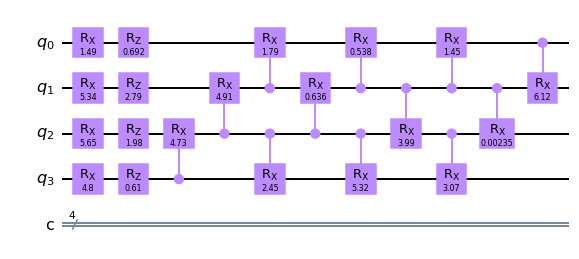

In [35]:
n = 4
qc = qiskit.QuantumCircuit(n, n)
thetas = np.random.uniform(low=0, high=2*np.pi, size=(8*n - 4,))
qc = entangled_circuit.xz_layer(qc, thetas[:2*n])
for i in range(0, 4):
    qc = entangled_circuit.entangled_r_layer(qc, thetas[2*n + i*(n-1):2*n + (i + 1)*(n-1)], type = 'rz', num_upsidedown=i)

qc.draw('mpl')

In [42]:
list_of_quanv = {
      '1': entangled_circuit.quanvolutional1, 
      '3': entangled_circuit.quanvolutional3,
      '4': entangled_circuit.quanvolutional4,
}

for a in list_of_quanv:
    print(type(list_of_quanv[a]))

<class 'function'>
<class 'function'>
<class 'function'>
